In [ ]:
!git clone https://github.com/hiive/mlrose.git
!pip install networkx
!pip install ./mlrose/
# Per Edstem post #898 (ref: https://edstem.org/us/courses/61940/discussion/5334851)
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose_hiive


Cloning into 'mlrose'...
remote: Enumerating objects: 2679, done.
remote: Counting objects: 100% (1043/1043), done.
remote: Compressing objects: 100% (218/218), done.
remote: Total 2679 (delta 907), reused 825 (delta 825), pack-reused 1636 (from 1)
Receiving objects: 100% (2679/2679), 1.88 MiB | 5.23 MiB/s, done.
Resolving deltas: 100% (1907/1907), done.
Processing ./mlrose
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose_hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=104275 sha256=1c66850de5450f2686cb23f723dad7c563e5b4fb6ee2e4e72bb7790739f03c0c
  Stored in directory: /tmp/pip-ephem-wheel-cache-9bstu2ov/wheels/50/ac/56/a248001dcf63344fbef992039dec2613cb4a7c56222c6f9a92
Successfully built mlrose_hiive


In [ ]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt

def queens_max(state):

        # Initialize counter
        fitness_cnt = 0

        # For all pairs of queens
        for i in range(len(state) - 1):
            for j in range(i + 1, len(state)):

                # Check for horizontal, diagonal-up and diagonal-down attacks
                if (state[j] != state[i]) \
                    and (state[j] != state[i] + (j - i)) \
                    and (state[j] != state[i] - (j - i)):

                   # If no attacks, then increment counter
                   fitness_cnt += 1

        return fitness_cnt

# Initialize custom fitness function object
fitness_cust = mlrose.CustomFitness(queens_max)

In [ ]:
# Define initial state
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])
max_iterations = 200
max_attempts=100
restarts = 25
pop_size = 150
mut_prob = 0.1

np.random.seed(0)

In [ ]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt

def queens_max(state):
    fitness_cnt = 0
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            if (state[j] != state[i]) and (state[j] != state[i] + (j - i)) and (state[j] != state[i] - (j - i)):
                fitness_cnt += 1
    return fitness_cnt

# Custom fitness function
fitness_cust = mlrose.CustomFitness(queens_max)

# Problem sizes to compare
problem_sizes = [8, 24, 64, 128]
max_iterations = 200
max_attempts = 100
restarts = restarts
pop_size = pop_size
mut_prob = mut_prob

# Store results for plotting
fitness_curves = {}

# Loop through each problem size
for size in problem_sizes:
    print(f"\n--- Running for {size}-Queens Problem ---")

    init_state = np.random.randint(size, size=size)
    problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness_cust, maximize=True, max_val=size)

    # Randomized Hill Climbing (RHC)
    best_state_rhc, best_fitness_rhc, fitness_curve_rhc = mlrose.random_hill_climb(
        problem, max_attempts=max_attempts, max_iters=max_iterations, init_state=init_state, curve=True, random_state=1)

    # RHC with Restarts
    best_state_rhc_restarts, best_fitness_rhc_restarts, fitness_curve_rhc_restarts = mlrose.random_hill_climb(
        problem, max_attempts=max_attempts, max_iters=max_iterations, restarts=restarts, init_state=init_state, curve=True, random_state=1)

    # Simulated Annealing (SA)
    schedule = mlrose.GeomDecay()
    best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose.simulated_annealing(
        problem, schedule=schedule, max_attempts=max_attempts, max_iters=max_iterations, init_state=init_state, curve=True, random_state=1)

    # Genetic Algorithm (GA)
    best_state_ga, best_fitness_ga, fitness_curve_ga = mlrose.genetic_alg(
        problem, pop_size=pop_size, mutation_prob=mut_prob, max_attempts=max_attempts, max_iters=max_iterations, curve=True, random_state=1)

    # Store fitness curves for plotting
    fitness_curves[size] = {
        'RHC': fitness_curve_rhc[:, 0],
        'RHC_Restarts': fitness_curve_rhc_restarts[:, 0],
        'SA': fitness_curve_sa[:, 0],
        'GA': fitness_curve_ga[:, 0]
    }


--- Running for 8-Queens Problem ---

--- Running for 24-Queens Problem ---

--- Running for 64-Queens Problem ---

--- Running for 128-Queens Problem ---


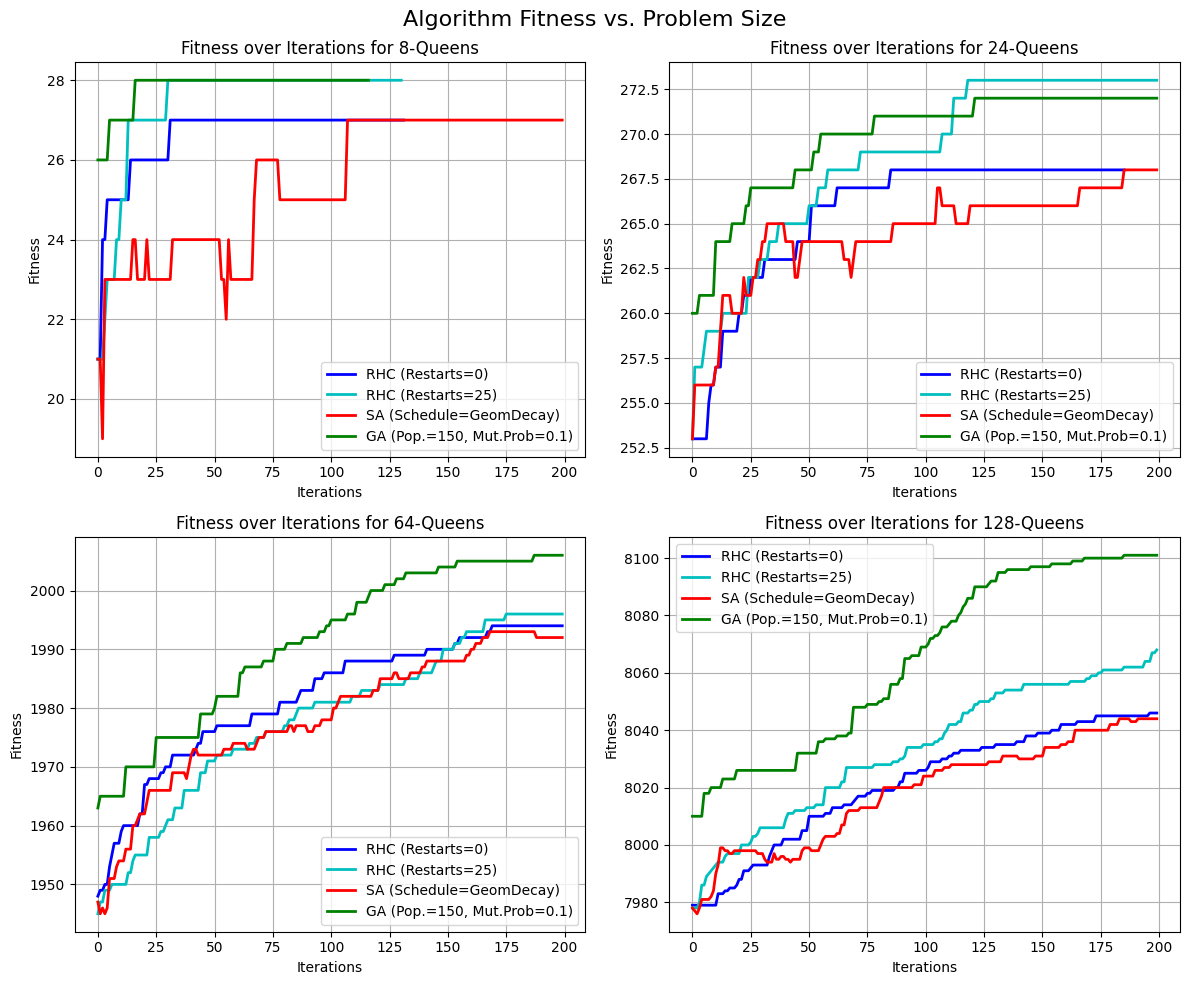

In [ ]:
# Plot the results for comparison
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
problem_titles = ['8-Queens', '24-Queens', '64-Queens', '128-Queens']
fig.suptitle("Algorithm Fitness vs. Problem Size", fontsize=16)

# Plot each problem size's fitness curves
for i, size in enumerate(problem_sizes):
    ax = axs[i // 2, i % 2]
    curves = fitness_curves[size]

    ax.plot(curves['RHC'], label="RHC (Restarts=0)", color='b', linewidth=2)
    ax.plot(curves['RHC_Restarts'], label=f"RHC (Restarts={restarts})", color='c', linewidth=2)
    ax.plot(curves['SA'], label="SA (Schedule=GeomDecay)", color='r', linewidth=2)
    ax.plot(curves['GA'], label=f"GA (Pop.={pop_size}, Mut.Prob={mut_prob})", color='g', linewidth=2)

    ax.set_title(f"Fitness over Iterations for {problem_titles[i]}")
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Fitness")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

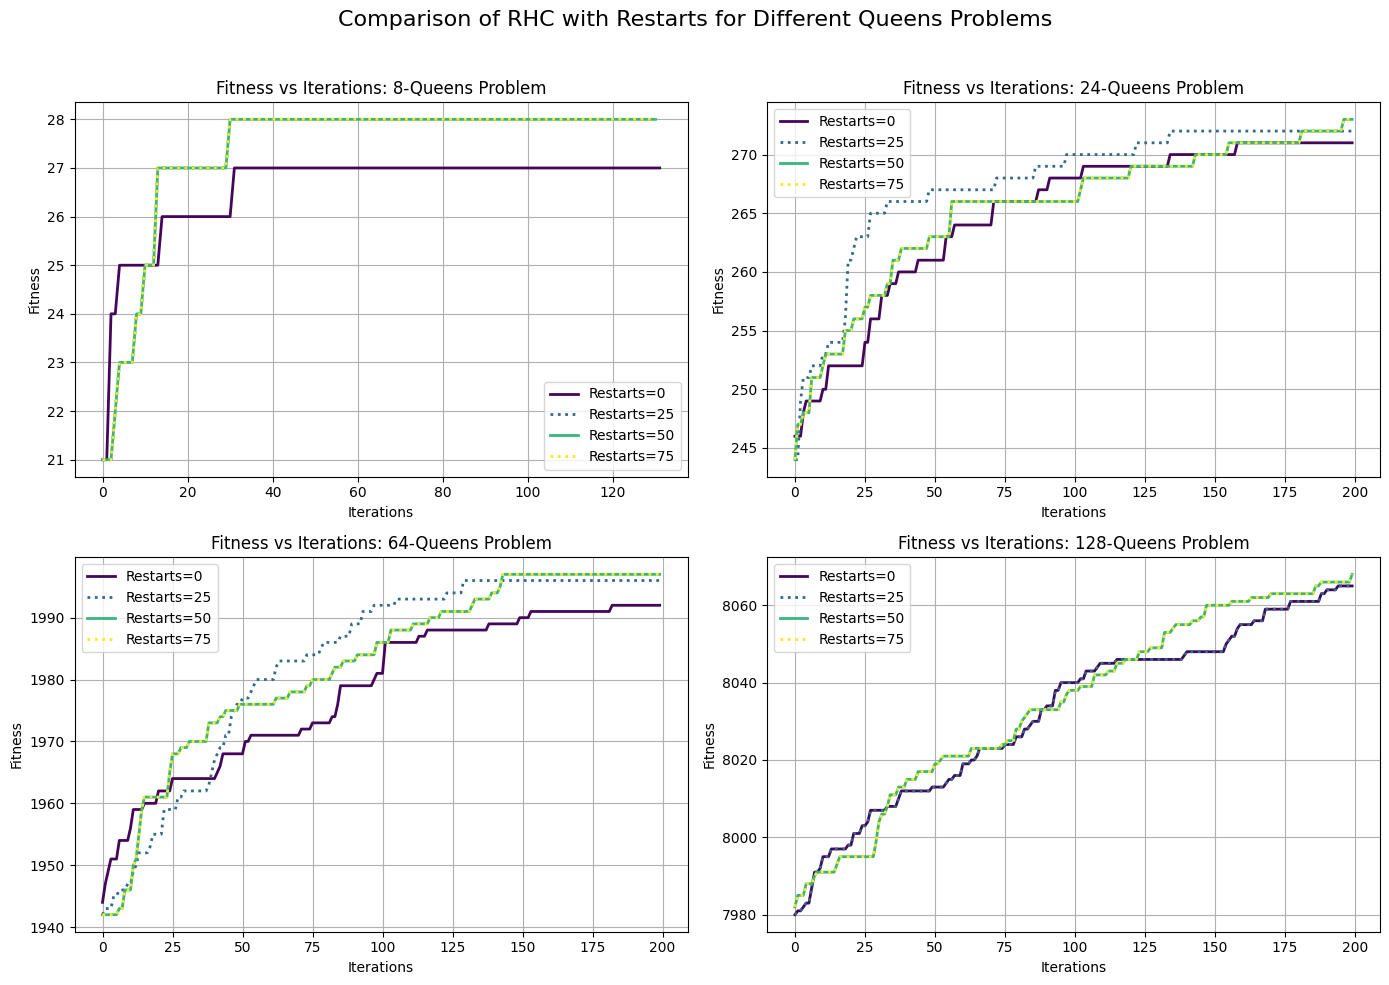

In [ ]:
import matplotlib.pyplot as plt
import mlrose_hiive as mlrose
import numpy as np

# Set the problem sizes
problem_sizes = ['8-Queens', '24-Queens', '64-Queens', '128-Queens']

# Define a custom fitness function for the N-Queens problem
def queens_max(state):
    fitness_cnt = 0
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            if (state[j] != state[i]) and (state[j] != state[i] + (j - i)) and (state[j] != state[i] - (j - i)):
                fitness_cnt += 1
    return fitness_cnt

# Initialize custom fitness function object
fitness_cust = mlrose.CustomFitness(queens_max)

# Parameters
max_iterations = 200
max_attempts = 100
total_restarts = 75
steps = 25

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Loop through each problem size and generate the plots
for idx, size in enumerate([8, 24, 64, 128]):
    # Create problem instance for each size
    problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness_cust, maximize=True, max_val=size)

    # Generate an initial state for the problem
    init_state = np.random.randint(size, size=size)

    # Access the current subplot
    ax = axs[idx // 2, idx % 2]

    # Run RHC with different restarts and plot results
    for restart in range(0, total_restarts + 1, steps):
        cmap = plt.get_cmap('viridis')
        best_state_rhc_restarts, best_fitness_rhc_restarts, fitness_curve_rhc_restarts = mlrose.random_hill_climb(
            problem,
            max_attempts=max_attempts,
            max_iters=max_iterations,
            restarts=restart,
            init_state=init_state,
            curve=True,
            random_state=1
        )
        fitness_values_rhc_restarts = fitness_curve_rhc_restarts[:, 0]

        # Line style based on restarts
        if restart % 10 == 0:
            line_style = '-'
        else:
            line_style = 'dotted'

        # Plot the fitness curves
        ax.plot(fitness_values_rhc_restarts, label=f"Restarts={restart}", color=cmap((restart+1)/(total_restarts+1)), linewidth=2, linestyle=line_style)

    # Set titles and labels for each subplot
    ax.set_title(f"Fitness vs Iterations: {size}-Queens Problem")
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Fitness")
    ax.legend()
    ax.grid(True)

# Add a main title to the entire figure
fig.suptitle("Comparison of RHC with Restarts for Different Queens Problems", fontsize=16)

# Adjust layout for better visualization
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


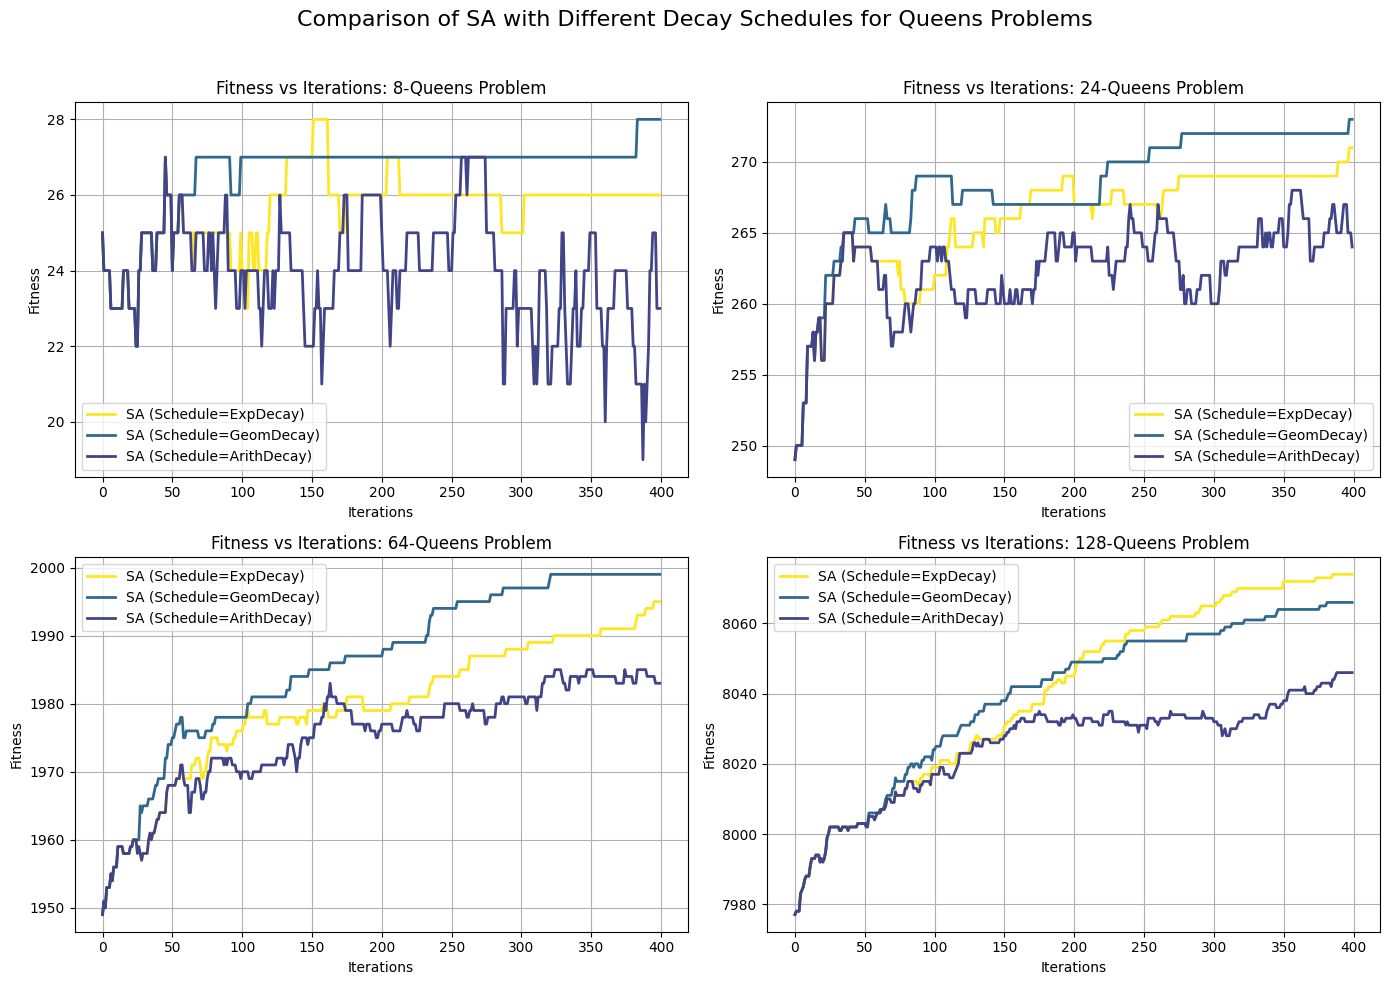

In [ ]:
import matplotlib.pyplot as plt
import mlrose_hiive as mlrose
import numpy as np

# Set the problem sizes
problem_sizes = ['8-Queens', '24-Queens', '64-Queens', '128-Queens']

# Define a custom fitness function for the N-Queens problem
def queens_max(state):
    fitness_cnt = 0
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            if (state[j] != state[i]) and (state[j] != state[i] + (j - i)) and (state[j] != state[i] - (j - i)):
                fitness_cnt += 1
    return fitness_cnt

# Initialize custom fitness function object
fitness_cust = mlrose.CustomFitness(queens_max)

# Parameters
max_iterations = 400
max_attempts = 100
schedules = [mlrose.ExpDecay(), mlrose.GeomDecay(), mlrose.ArithDecay()]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Loop through each problem size and generate the plots
for idx, size in enumerate([8, 24, 64, 128]):
    # Create problem instance for each size
    problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness_cust, maximize=True, max_val=size)

    # Generate an initial state for the problem
    init_state = np.random.randint(size, size=size)

    # Access the current subplot
    ax = axs[idx // 2, idx % 2]

    # Run SA with different schedules and plot results
    color_factor = 0.5
    cmap = plt.get_cmap('viridis')
    for decay_schedule in schedules:
        best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose.simulated_annealing(
            problem,
            schedule=decay_schedule,
            max_attempts=max_attempts,
            max_iters=max_iterations,
            init_state=init_state,
            curve=True,
            random_state=1
        )
        fitness_curve_sa = fitness_curve_sa[:, 0]
        ax.plot(fitness_curve_sa, label=f"SA (Schedule={decay_schedule.__class__.__name__})",
                color=cmap(0.5/color_factor), linewidth=2)
        color_factor += 1

    # Set titles and labels for each subplot
    ax.set_title(f"Fitness vs Iterations: {size}-Queens Problem")
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Fitness")
    ax.legend()
    ax.grid(True)

# Add a main title to the entire figure
fig.suptitle("Comparison of SA with Different Decay Schedules for Queens Problems", fontsize=16)

# Adjust layout for better visualization
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


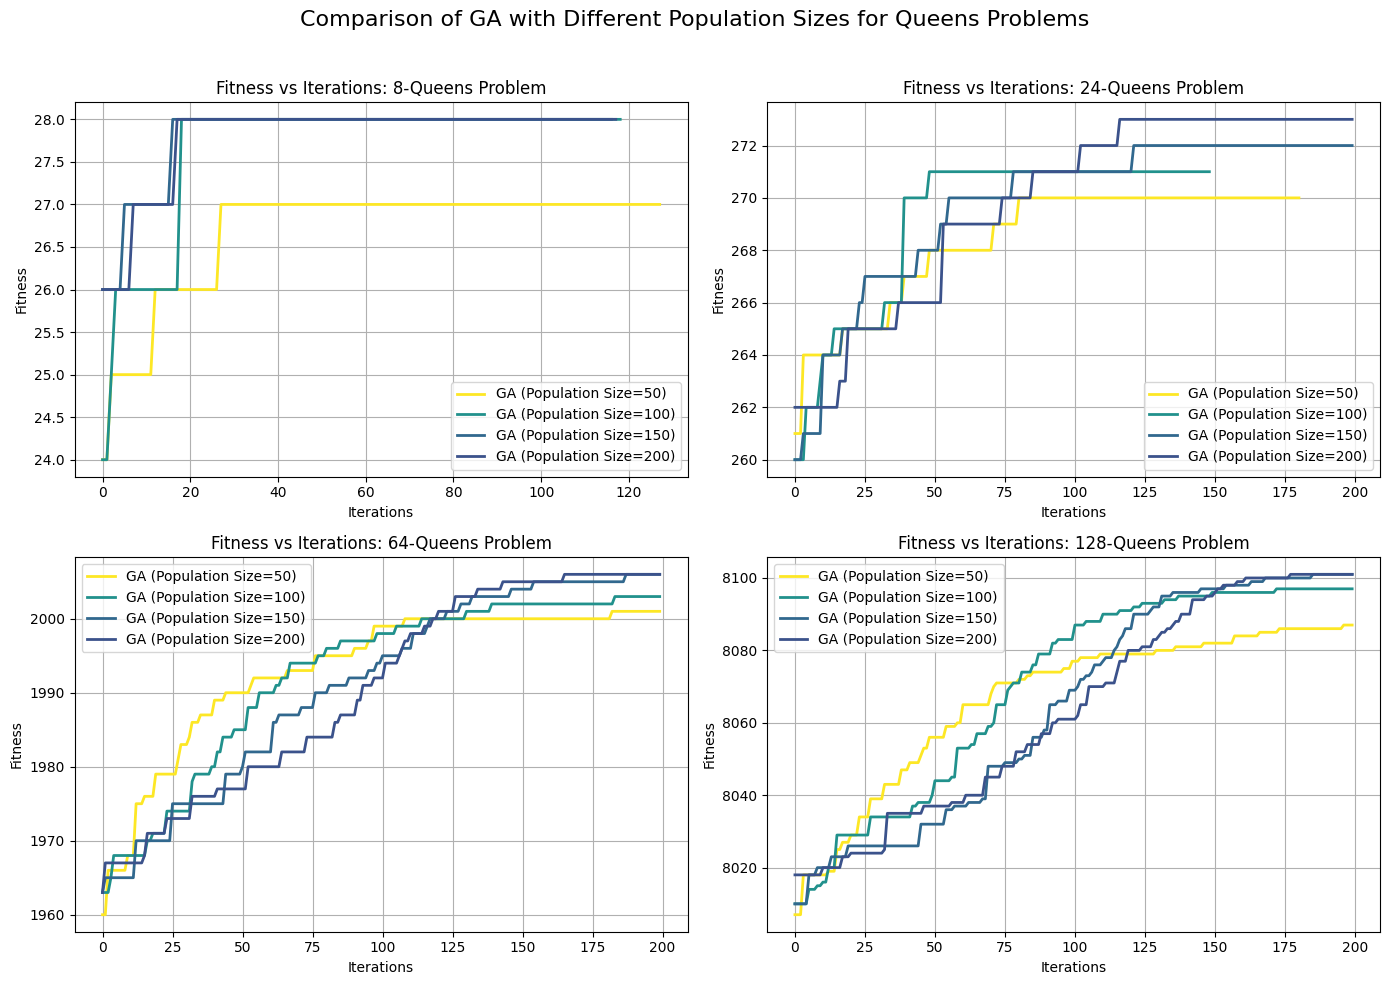

In [ ]:
import matplotlib.pyplot as plt
import mlrose_hiive as mlrose
import numpy as np

# Set the problem sizes
problem_sizes = ['8-Queens', '24-Queens', '64-Queens', '128-Queens']

# Define a custom fitness function for the N-Queens problem
def queens_max(state):
    fitness_cnt = 0
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            if (state[j] != state[i]) and (state[j] != state[i] + (j - i)) and (state[j] != state[i] - (j - i)):
                fitness_cnt += 1
    return fitness_cnt

# Initialize custom fitness function object
fitness_cust = mlrose.CustomFitness(queens_max)

# Parameters
max_iterations = 200
max_attempts = 100
population_sizes = [50, 100, 150, 200]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Loop through each problem size and generate the plots
for idx, size in enumerate([8, 24, 64, 128]):
    # Create problem instance for each size
    problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness_cust, maximize=True, max_val=size)

    # Generate an initial state for the problem
    init_state = np.random.randint(size, size=size)

    # Access the current subplot
    ax = axs[idx // 2, idx % 2]

    # Run GA with different population sizes and plot results
    color_factor = 0.5
    cmap = plt.get_cmap('viridis')
    for pop_size in population_sizes:
        best_state_ga, best_fitness_ga, fitness_curve_ga = mlrose.genetic_alg(
            problem,
            pop_size=pop_size,
            mutation_prob=0.1,
            max_attempts=max_attempts,
            max_iters=max_iterations,
            curve=True,
            random_state=1
        )
        fitness_curve_ga = fitness_curve_ga[:, 0]
        ax.plot(fitness_curve_ga, label=f"GA (Population Size={pop_size})",
                color=cmap(50/pop_size), linewidth=2)

    # Set titles and labels for each subplot
    ax.set_title(f"Fitness vs Iterations: {size}-Queens Problem")
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Fitness")
    ax.legend()
    ax.grid(True)

# Add a main title to the entire figure
fig.suptitle("Comparison of GA with Different Population Sizes for Queens Problems", fontsize=16)

# Adjust layout for better visualization
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


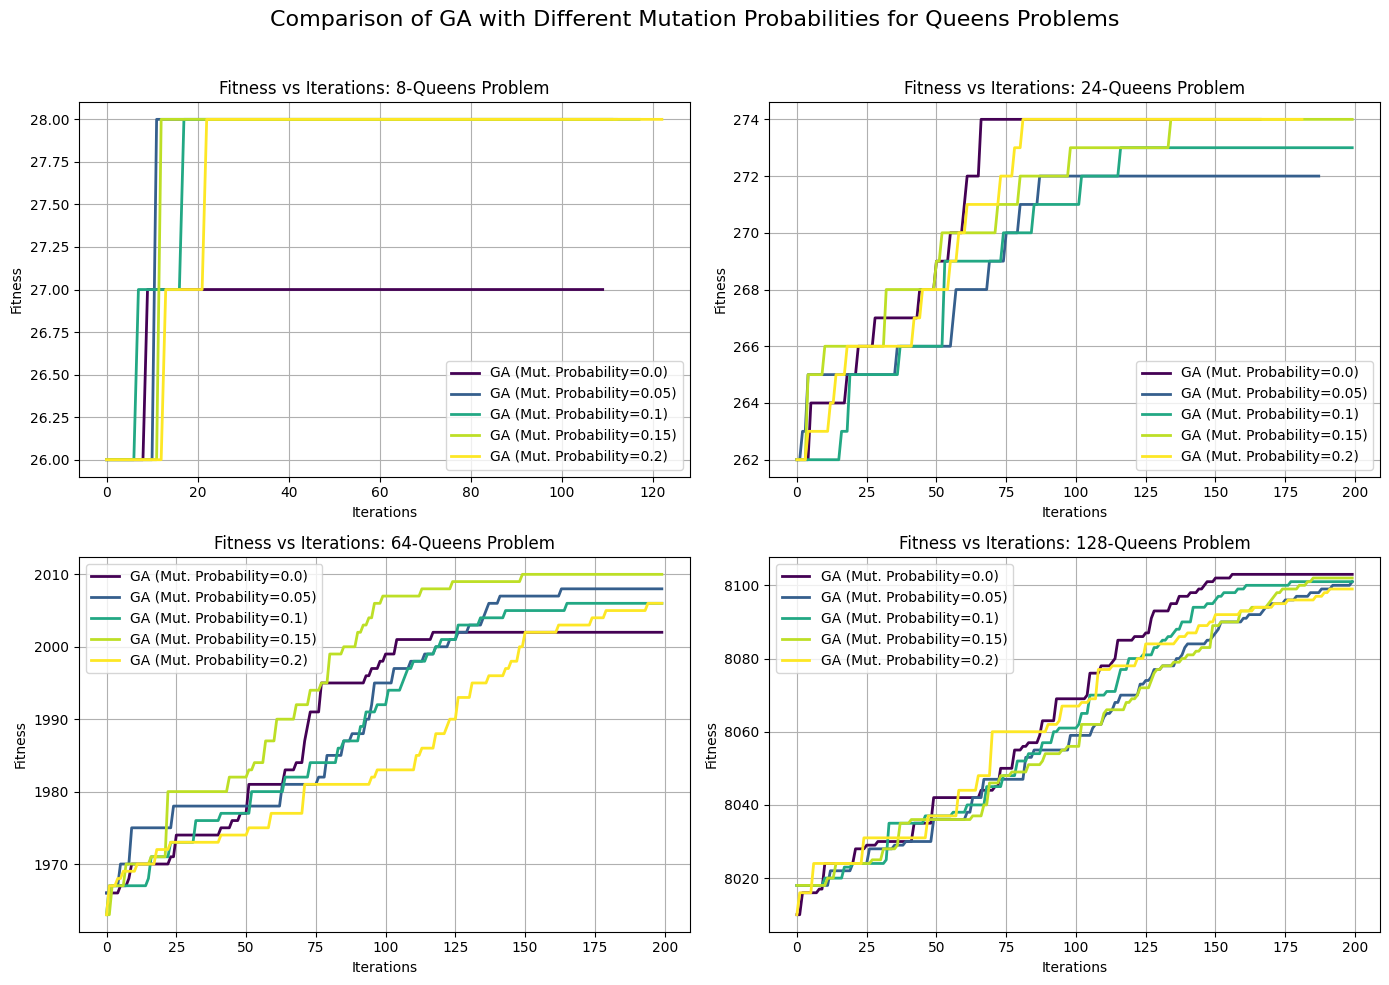

In [ ]:
import matplotlib.pyplot as plt
import mlrose_hiive as mlrose
import numpy as np

# Set the problem sizes
problem_sizes = ['8-Queens', '24-Queens', '64-Queens', '128-Queens']

# Define a custom fitness function for the N-Queens problem
def queens_max(state):
    fitness_cnt = 0
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            if (state[j] != state[i]) and (state[j] != state[i] + (j - i)) and (state[j] != state[i] - (j - i)):
                fitness_cnt += 1
    return fitness_cnt

# Initialize custom fitness function object
fitness_cust = mlrose.CustomFitness(queens_max)

# Parameters
max_iterations = 200
max_attempts = 100
mutation_probs = np.arange(0.0, 0.21, 0.05)  # Mutation probabilities

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Loop through each problem size and generate the plots
for idx, size in enumerate([8, 24, 64, 128]):
    # Create problem instance for each size
    problem = mlrose.DiscreteOpt(length=size, fitness_fn=fitness_cust, maximize=True, max_val=size)

    # Generate an initial state for the problem
    init_state = np.random.randint(size, size=size)

    # Access the current subplot
    ax = axs[idx // 2, idx % 2]

    # Run GA with different mutation probabilities and plot results
    color_factor = 0.5
    cmap = plt.get_cmap('viridis')
    for prob in mutation_probs:
        best_state_ga, best_fitness_ga, fitness_curve_ga = mlrose.genetic_alg(
            problem,
            pop_size=200,  # Fixed population size
            mutation_prob=prob,
            max_attempts=max_attempts,
            max_iters=max_iterations,
            curve=True,
            random_state=1
        )
        fitness_curve_ga = fitness_curve_ga[:, 0]
        ax.plot(fitness_curve_ga, label=f"GA (Mut. Probability={np.round(prob, 3)})",
                color=cmap(prob * 6), linewidth=2)

    # Set titles and labels for each subplot
    ax.set_title(f"Fitness vs Iterations: {size}-Queens Problem")
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Fitness")
    ax.legend()
    ax.grid(True)

# Add a main title to the entire figure
fig.suptitle("Comparison of GA with Different Mutation Probabilities for Queens Problems", fontsize=16)

# Adjust layout for better visualization
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


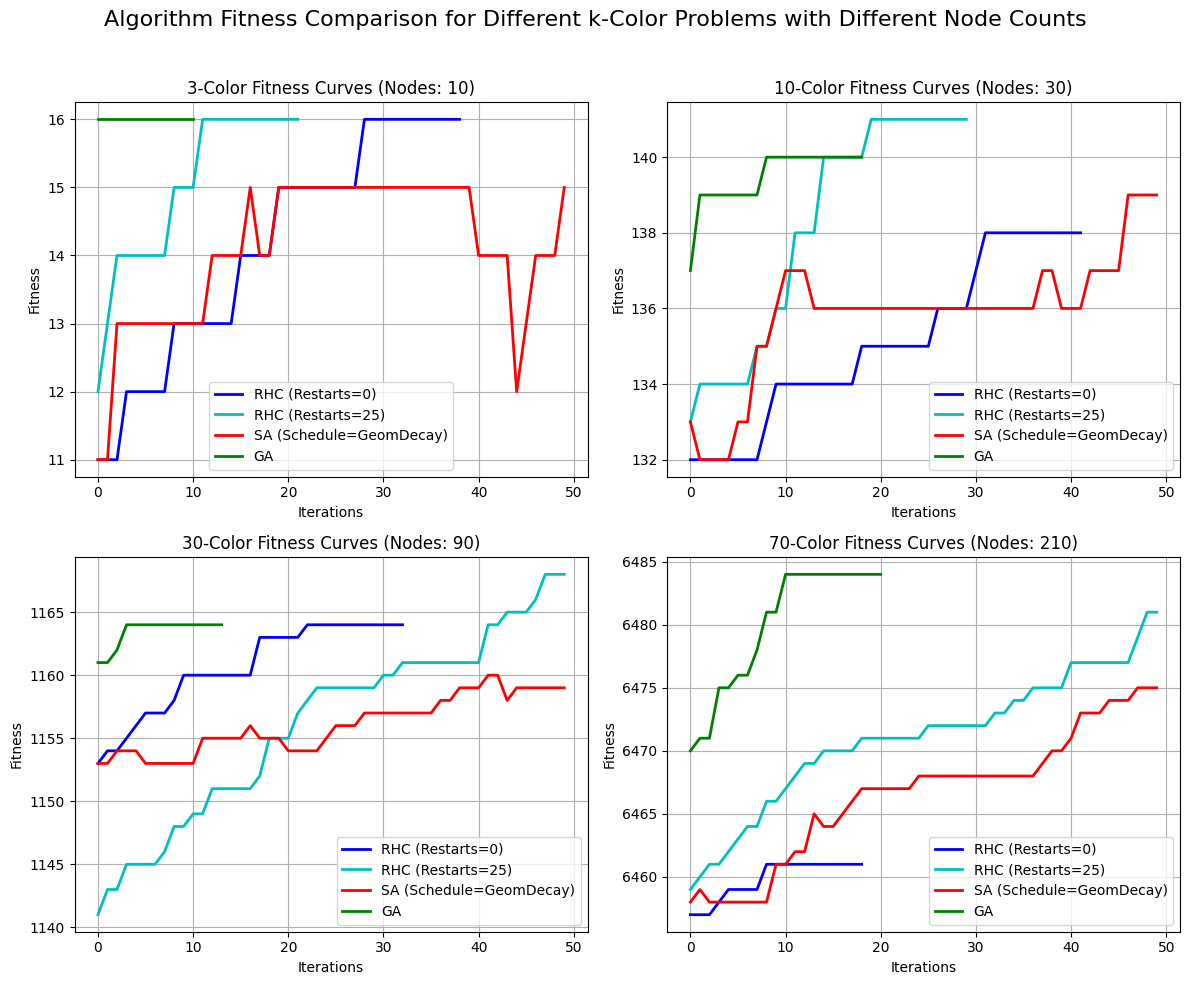

In [ ]:
import networkx as nx
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt

# Function to solve the k-Color problem and return the fitness curves for comparison
def solve_k_color(num_nodes, prob_edge, k, seed=42):
    G = nx.erdos_renyi_graph(n=num_nodes, p=prob_edge, seed=seed)
    edges = list(G.edges())

    # Define the fitness function for the k-Color problem
    fitness = mlrose.MaxKColor(edges, maximize=True)

    # Define the number of colors (ensure at least 2 colors)
    num_colors = max(2, k)

    # Define the optimization problem
    problem = mlrose.DiscreteOpt(length=num_nodes, fitness_fn=fitness, maximize=True, max_val=num_colors)

    # Parameters
    max_iterations = 50
    max_attempts = 10
    restarts = 25
    pop_size = 150
    mut_prob = 0.1

    init_state = np.random.randint(num_colors, size=num_nodes)

    # Randomized Hill Climbing (RHC)
    best_state_rhc, best_fitness_rhc, fitness_curve_rhc = mlrose.random_hill_climb(
        problem, max_attempts=max_attempts, max_iters=max_iterations, init_state=init_state, curve=True, random_state=1)

    # RHC with Restarts
    best_state_rhc_restarts, best_fitness_rhc_restarts, fitness_curve_rhc_restarts = mlrose.random_hill_climb(
        problem, max_attempts=max_attempts, max_iters=max_iterations, restarts=restarts, curve=True, random_state=1)

    # Simulated Annealing (SA)
    schedule = mlrose.GeomDecay()
    best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose.simulated_annealing(
        problem, schedule=schedule, max_attempts=max_attempts, max_iters=max_iterations, init_state=init_state, curve=True, random_state=1)

    # Genetic Algorithm (GA)
    best_state_ga, best_fitness_ga, fitness_curve_ga = mlrose.genetic_alg(
        problem, pop_size=pop_size, mutation_prob=mut_prob, max_attempts=max_attempts, max_iters=max_iterations, curve=True, random_state=1)

    return fitness_curve_rhc, fitness_curve_rhc_restarts, fitness_curve_sa, fitness_curve_ga, G

# List of num_nodes values
node_counts = [10, 30, 90, 210]
prob_edge = 0.3

# Dictionary to store fitness curves and graphs
fitness_curves = {}
graphs = {}

for num_nodes in node_counts:
    k = num_nodes // 3  # Set k value to num_nodes // 3
    fitness_curves[num_nodes], fitness_curves[f'RHC_Restarts_{num_nodes}'], fitness_curves[f'SA_{num_nodes}'], fitness_curves[f'GA_{num_nodes}'], graphs[num_nodes] = solve_k_color(num_nodes, prob_edge, k)

# Plot fitness curves for different num_nodes
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, num_nodes in enumerate(node_counts):
    ax = axs[i // 2, i % 2]
    ax.plot(fitness_curves[num_nodes][:, 0], label="RHC (Restarts=0)", color='b', linewidth=2)
    ax.plot(fitness_curves[f'RHC_Restarts_{num_nodes}'][:, 0], label=f"RHC (Restarts={restarts})", color='c', linewidth=2)
    ax.plot(fitness_curves[f'SA_{num_nodes}'][:, 0], label="SA (Schedule=GeomDecay)", color='r', linewidth=2)
    ax.plot(fitness_curves[f'GA_{num_nodes}'][:, 0], label="GA", color='g', linewidth=2)

    ax.set_title(f"{max(2, num_nodes // 3)}-Color Fitness Curves (Nodes: {num_nodes})")
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Fitness")
    ax.legend()
    ax.grid(True)

fig.suptitle("Algorithm Fitness Comparison for Different k-Color Problems with Different Node Counts", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


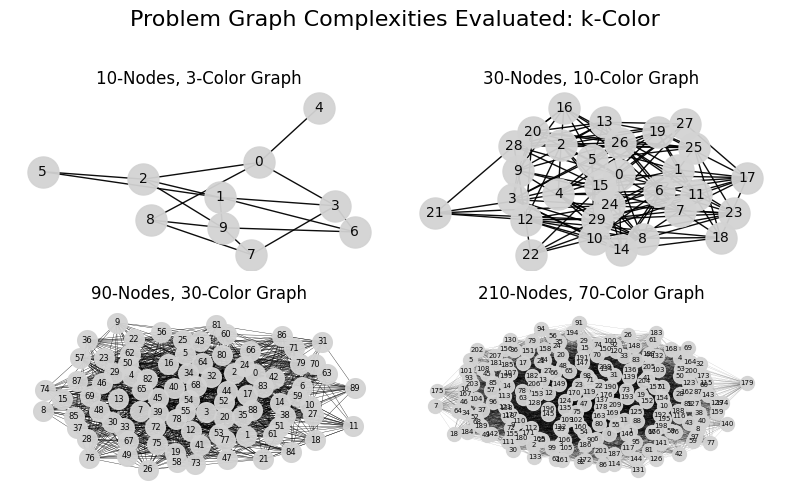

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

line_width = 1
# Function to plot the generated graphs with adjusted node size, font size, and transparent edges
def plot_nx_graphs_in_subplots(graphs, node_counts):
    fig, axs = plt.subplots(2, 2, figsize=(8, 5))

    for i, num_nodes in enumerate(node_counts):
        k = num_nodes // 3  # Set k value to num_nodes // 3
        ax = axs[i // 2, i % 2]  # Access the appropriate subplot

        # Generate spring layout positions for the nodes
        pos = nx.spring_layout(graphs[num_nodes], seed=42)

        # Adjust node size and font size if the number of nodes > 30
        if num_nodes > 200:
            node_size = 100
            font_size = 5
            line_width = 0.05
        elif num_nodes > 30:
            node_size = 200
            font_size = 6
            line_width = 0.25
        else:
            node_size = 500
            font_size = 10
            line_width = 1

        # Plot the graph in the current subplot with adjusted node and font sizes, and transparent edges
        nx.draw(graphs[num_nodes], pos, with_labels=True, node_color='lightgrey', edge_color='black',
                node_size=node_size,width=line_width ,font_size=font_size, alpha=0.95, ax=ax)  # Added alpha=0.5 for transparent edges

        ax.set_title(f"{num_nodes}-Nodes, {k}-Color Graph")

    fig.suptitle("Problem Graph Complexities Evaluated: k-Color", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Now call the function to plot all graphs in a 2x2 subplot
plot_nx_graphs_in_subplots(graphs, node_counts)


In [ ]:
#NN
import mlrose_hiive as mlrose
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time


# Define initial state
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])
max_iterations = 200
max_attempts=100
restarts = 25
pop_size = 150
mut_prob = 0.1
seed = 1

# Load dataset
df = pd.read_csv('diabetes.csv')

# Initialize X matrix, y targets, and perform train-test split
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List of algorithms to compare
algorithms = ['random_hill_climb', 'random_hill_climb_restarts', 'simulated_annealing', 'genetic_alg']
results = []

time_to_run = []
# Track performance over iterations for each algorithm
for algorithm in algorithms:
    start_time = time.time()
    algorithm_results = []  # Store results for current algorithm
    for i in range(0, 801, 100):  # Number of iterations to compare
        if algorithm == 'random_hill_climb_restarts':
          model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                       algorithm='random_hill_climb', max_iters=i,
                                        bias=True, is_classifier=True, restarts=restarts, learning_rate=0.1,
                                        early_stopping=True, clip_max=5, max_attempts=max_attempts,
                                        random_state=42)
        else:
          model = mlrose.NeuralNetwork(hidden_nodes=[4], activation='relu',
                                       algorithm=algorithm, max_iters=i,
                                        bias=True, is_classifier=True, learning_rate=0.1,
                                        early_stopping=True, clip_max=5, max_attempts=max_attempts, pop_size = pop_size,
                                        random_state=42)
        # Fit the model
        model.fit(X_train_scaled, y_train)
        # Train accuracy
        y_train_pred = model.predict(X_train_scaled)
        y_train_accuracy = accuracy_score(y_train, y_train_pred)

        # Test accuracy
        y_test_pred = model.predict(X_test_scaled)
        y_test_accuracy = accuracy_score(y_test, y_test_pred)

        # Append results
        algorithm_results.append([i, algorithm, y_train_accuracy, y_test_accuracy])
        print([i, algorithm, y_train_accuracy, y_test_accuracy])

    end_time = time.time()
    time_to_run.append((algorithm, end_time - start_time))
    # Store results for the current algorithm
    results.append(algorithm_results)

# Convert results to a DataFrame for easy analysis
columns = ['Iterations', 'Algorithm', 'Train Accuracy', 'Test Accuracy']
final_results = pd.DataFrame(np.vstack(results), columns=columns)

[0, 'random_hill_climb', 0.6107491856677525, 0.5714285714285714]
[100, 'random_hill_climb', 0.6547231270358306, 0.5974025974025974]
[200, 'random_hill_climb', 0.7117263843648208, 0.6883116883116883]
[300, 'random_hill_climb', 0.7328990228013029, 0.7012987012987013]
[400, 'random_hill_climb', 0.755700325732899, 0.7272727272727273]
[500, 'random_hill_climb', 0.754071661237785, 0.7142857142857143]
[600, 'random_hill_climb', 0.755700325732899, 0.7077922077922078]
[700, 'random_hill_climb', 0.7736156351791531, 0.7077922077922078]
[800, 'random_hill_climb', 0.7703583061889251, 0.7142857142857143]
[0, 'random_hill_climb_restarts', 0.6726384364820847, 0.6428571428571429]
[100, 'random_hill_climb_restarts', 0.6547231270358306, 0.5974025974025974]
[200, 'random_hill_climb_restarts', 0.7703583061889251, 0.7857142857142857]
[300, 'random_hill_climb_restarts', 0.7768729641693811, 0.7402597402597403]
[400, 'random_hill_climb_restarts', 0.7801302931596091, 0.7727272727272727]
[500, 'random_hill_climb

In [ ]:
final_results.head()

,Iterations,Algorithm,Train Accuracy,Test Accuracy
0,0,random_hill_climb,0.6107491856677525,0.5714285714285714
1,100,random_hill_climb,0.6547231270358306,0.5974025974025974
2,200,random_hill_climb,0.7117263843648208,0.6883116883116883
3,300,random_hill_climb,0.7328990228013029,0.7012987012987013
4,400,random_hill_climb,0.755700325732899,0.7272727272727273


In [ ]:
rhc_res = final_results[final_results['Algorithm'] == 'random_hill_climb']
rhc_restarts_res = final_results[final_results['Algorithm'] == 'random_hill_climb_restarts']
sa_res = final_results[final_results['Algorithm'] == 'simulated_annealing']
ga_res = final_results[final_results['Algorithm'] == 'genetic_alg']
gd = [(0, 0.31168830394744873), (100, 0.7902597665786743), (200, 0.7467532753944397), (300, 0.7402597665786743), (400, 0.7142857313156128), (500, 0.7402597665786743), (600, 0.7207792401313782), (700, 0.7207792401313782), (800, 0.7142857313156128)]
gd_keys = [i[0] for i in gd]
gd_values = [i[1] for i in gd]

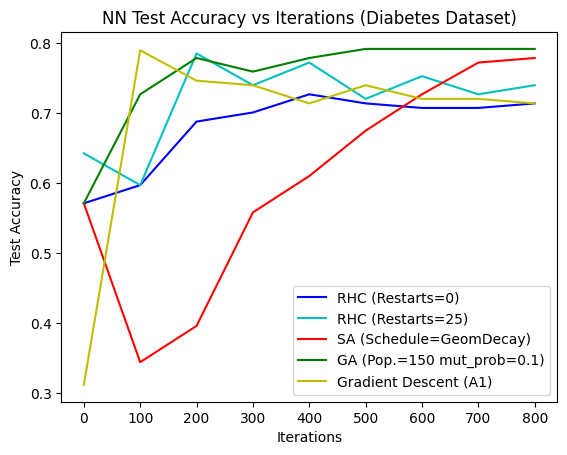

In [ ]:
plt.plot(rhc_res['Iterations'], np.round(rhc_res['Test Accuracy'].astype('float64'),4), label='RHC (Restarts=0)', color='b')
plt.plot(rhc_restarts_res['Iterations'], np.round(rhc_restarts_res['Test Accuracy'].astype('float64'),4), label=f'RHC (Restarts={restarts})', color='c')
plt.plot(sa_res['Iterations'], np.round(sa_res['Test Accuracy'].astype('float64'),4), label='SA (Schedule=GeomDecay)', color='r')
plt.plot(ga_res['Iterations'], np.round(ga_res['Test Accuracy'].astype('float64'),4), label=f'GA (Pop.={pop_size} mut_prob={mut_prob})', color='g')
plt.plot(ga_res['Iterations'], pd.Series(gd_values), label='Gradient Descent (A1)', color='y')


plt.title('NN Test Accuracy vs Iterations (Diabetes Dataset)')
plt.xlabel('Iterations')
plt.ylabel('Test Accuracy')
plt.legend()

In [ ]:
max(np.round(ga_res['Test Accuracy'].astype('float64'),4)), max(np.round(sa_res['Test Accuracy'].astype('float64'),4))

(0.7922, 0.7792)

In [ ]:
pd.Series(gd_keys)

,0
0,0
1,100
2,200
3,300
4,400
5,500
6,600
7,700
8,800


In [ ]:
times_df = pd.DataFrame(time_to_run, columns=['Algorithm', 'Time'])
times_df

,Algorithm,Time
0,random_hill_climb,10.468059
1,random_hill_climb_restarts,286.280167
2,simulated_annealing,14.443352
3,genetic_alg,952.126560


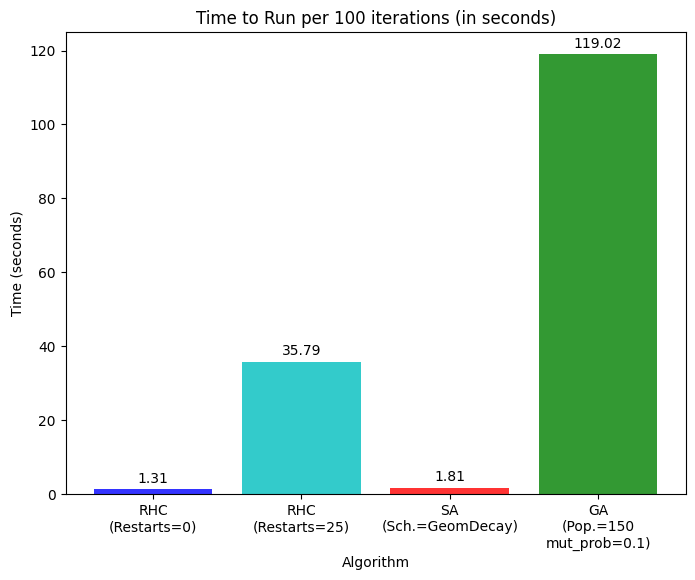

In [ ]:
# Plotting the bar chart
times_df.Algorithm = ['RHC\n(Restarts=0)', f'RHC\n(Restarts={restarts})', 'SA\n(Sch.=GeomDecay)', f'GA\n(Pop.={pop_size}\nmut_prob={mut_prob})']
plt.figure(figsize=(8, 6))
bars = plt.bar(times_df.iloc[:, 0], times_df.iloc[:, 1]/8, color=['b', 'c', 'r', 'g'], alpha=0.8)

# Adding the values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

# Adding title and labels
plt.title('Time to Run per 100 iterations (in seconds)')
plt.ylabel('Time (seconds)')
plt.xlabel('Algorithm')

# Show the plot
plt.show()


In [ ]:
rhc_per_100_time = 2.72
rhc_restarts_per_100_time = 64.61
sa_per_100_time = 1.77
ga_per_100_time = 117.66

In [ ]:
rhc_argmax = np.argmax(rhc_res['Test Accuracy'])
rhc_restarts_argmax = np.argmax(rhc_restarts_res['Test Accuracy'])
sa_argmax = np.argmax(sa_res['Test Accuracy'])
ga_argmax = np.argmax(ga_res['Test Accuracy'])
gd_argmax =

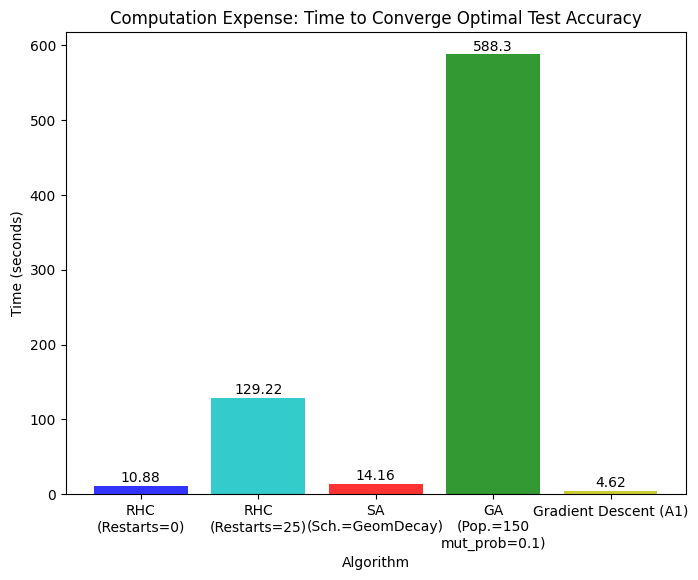

In [ ]:
bar_columns = ['RHC\n(Restarts=0)', f'RHC\n(Restarts={restarts})', 'SA\n(Sch.=GeomDecay)', f'GA\n(Pop.={pop_size}\nmut_prob={mut_prob})', 'Gradient Descent (A1)']
time_to_max = [rhc_argmax*rhc_per_100_time, rhc_restarts_per_100_time*rhc_restarts_argmax, sa_per_100_time*sa_argmax, ga_per_100_time*ga_argmax, 4.62]

plt.figure(figsize=(8, 6))
bars = plt.bar(bar_columns, time_to_max, color=['b', 'c', 'r', 'g', 'y'], alpha=0.8)

# Adding the values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

# Adding title and labels
plt.title('Computation Expense: Time to Converge Optimal Test Accuracy')
plt.ylabel('Time (seconds)')
plt.xlabel('Algorithm')

# Show the plot
plt.show()